# Project 4

Create code to answer each of the following questions.

> Project Description/Outline: This project will look at the data on 


In [1]:
#Importing Dependencies:
#%matplotlib inline
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns # library used for data visualization
import matplotlib.pyplot as plt # library used for data visualization
from matplotlib.figure import Figure
import os
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) # Used for x & y axis / label to be seen clearly or visible

In [2]:
#Reading data :
edu_df = pd.read_csv("Resources/df1.csv")

# Data Exploration

In [3]:
edu_df

,ID,Name,State,Region,Applications,Admissions,Admission Rate,Enrollment,SATVR75,SATMT75,ACTEN75,ACTMT75
0,100654,Alabama A & M University,Alabama,Southeast,6560,4697,0.716006,1459,520,510,20,18
1,100663,University of Alabama at Birmingham,Alabama,Southeast,11906,10541,0.885352,2361,680,708,33,28
2,100706,University of Alabama in Huntsville,Alabama,Southeast,5781,4259,0.736724,1191,700,720,32,29
3,100724,Alabama State University,Alabama,Southeast,5974,5854,0.979913,797,534,516,22,19
4,100751,The University of Alabama,Alabama,Southeast,42421,33472,0.789043,7540,680,690,33,28
...,...,...,...,...,...,...,...,...,...,...,...,...
831,484905,University of North Texas at Dallas,Texas,Southwest,2618,2354,0.899160,293,500,520,21,21
832,486840,Kennesaw State University,Georgia,Southeast,20806,16975,0.815870,8011,630,620,25,26
833,486901,Milligan University,Tennessee,Southeast,860,519,0.603488,176,590,590,31,27
834,490805,Purdue University Northwest,Indiana,Great Lakes,3642,2781,0.763591,1040,600,590,24,26


In [4]:
# Statistical summanry of the dataframe
edu_df.describe()

,ID,Applications,Admissions,Admission Rate,Enrollment,SATVR75,SATMT75,ACTEN75,ACTMT75
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,188559.473684,9107.900718,5462.964115,0.719172,1214.632775,632.729665,628.691388,27.576555,26.379187
std,58531.055579,12845.145580,7282.498230,0.214781,1668.788605,62.379934,72.086212,4.694512,3.814375
min,100654.000000,197.000000,180.000000,0.039480,103.000000,420.000000,380.000000,13.000000,7.000000
25%,152369.750000,1833.500000,1320.250000,0.631535,293.750000,590.000000,580.000000,24.000000,24.000000
50%,185177.000000,4046.000000,2761.000000,0.769915,552.500000,630.000000,611.500000,27.000000,26.000000
75%,216359.250000,10424.000000,6487.000000,0.870585,1362.250000,674.250000,670.000000,32.000000,28.000000
max,495767.000000,96686.000000,89207.000000,1.000000,15785.000000,790.000000,800.000000,36.000000,36.000000


# Data Cleanup, drop insignificant column. 

In [5]:
edu_clean_df = edu_df.rename(columns={"SATVR75" : "SAT_Verbal_75",
                                     "SATMT75" : "SAT_Math_75",
                                     "ACTEN75" : "ACT_English_75",
                                     "ACTMT75" : "ACT_Math_75",
                                     "Admission Rate": "Admission_Rate"}
                                    )
edu_clean_df.columns

Index(['ID', 'Name', 'State', 'Region', 'Applications', 'Admissions',
       'Admission_Rate', 'Enrollment', 'SAT_Verbal_75', 'SAT_Math_75',
       'ACT_English_75', 'ACT_Math_75'],
      dtype='object')

In [6]:
#edu_clean_df = edu_clean_df.fillna(0)
edu_clean_df.dropna(how='any',axis=0) 
#edu_clean_df=edu_clean_df.astype({'SAT_Math_75': int,'SAT_Verbal_75': int,'ACT_English_75': int,'ACT_Math_75': int})
edu_clean_df

,ID,Name,State,Region,Applications,Admissions,Admission_Rate,Enrollment,SAT_Verbal_75,SAT_Math_75,ACT_English_75,ACT_Math_75
0,100654,Alabama A & M University,Alabama,Southeast,6560,4697,0.716006,1459,520,510,20,18
1,100663,University of Alabama at Birmingham,Alabama,Southeast,11906,10541,0.885352,2361,680,708,33,28
2,100706,University of Alabama in Huntsville,Alabama,Southeast,5781,4259,0.736724,1191,700,720,32,29
3,100724,Alabama State University,Alabama,Southeast,5974,5854,0.979913,797,534,516,22,19
4,100751,The University of Alabama,Alabama,Southeast,42421,33472,0.789043,7540,680,690,33,28
...,...,...,...,...,...,...,...,...,...,...,...,...
831,484905,University of North Texas at Dallas,Texas,Southwest,2618,2354,0.899160,293,500,520,21,21
832,486840,Kennesaw State University,Georgia,Southeast,20806,16975,0.815870,8011,630,620,25,26
833,486901,Milligan University,Tennessee,Southeast,860,519,0.603488,176,590,590,31,27
834,490805,Purdue University Northwest,Indiana,Great Lakes,3642,2781,0.763591,1040,600,590,24,26


In [7]:
edu_clean_df = edu_clean_df[(edu_clean_df.Region != "Other US Jurisdctn") & (edu_clean_df.Region != "US Service Schools")]
edu_clean_df

,ID,Name,State,Region,Applications,Admissions,Admission_Rate,Enrollment,SAT_Verbal_75,SAT_Math_75,ACT_English_75,ACT_Math_75
0,100654,Alabama A & M University,Alabama,Southeast,6560,4697,0.716006,1459,520,510,20,18
1,100663,University of Alabama at Birmingham,Alabama,Southeast,11906,10541,0.885352,2361,680,708,33,28
2,100706,University of Alabama in Huntsville,Alabama,Southeast,5781,4259,0.736724,1191,700,720,32,29
3,100724,Alabama State University,Alabama,Southeast,5974,5854,0.979913,797,534,516,22,19
4,100751,The University of Alabama,Alabama,Southeast,42421,33472,0.789043,7540,680,690,33,28
...,...,...,...,...,...,...,...,...,...,...,...,...
831,484905,University of North Texas at Dallas,Texas,Southwest,2618,2354,0.899160,293,500,520,21,21
832,486840,Kennesaw State University,Georgia,Southeast,20806,16975,0.815870,8011,630,620,25,26
833,486901,Milligan University,Tennessee,Southeast,860,519,0.603488,176,590,590,31,27
834,490805,Purdue University Northwest,Indiana,Great Lakes,3642,2781,0.763591,1040,600,590,24,26


In [8]:
edu_clean_df.shape

(830, 12)

In [9]:
edu_clean_df.isnull().sum()

ID                0
Name              0
State             0
Region            0
Applications      0
Admissions        0
Admission_Rate    0
Enrollment        0
SAT_Verbal_75     0
SAT_Math_75       0
ACT_English_75    0
ACT_Math_75       0
dtype: int64

In [10]:
edu_clean_df.dtypes

ID                  int64
Name               object
State              object
Region             object
Applications        int64
Admissions          int64
Admission_Rate    float64
Enrollment          int64
SAT_Verbal_75       int64
SAT_Math_75         int64
ACT_English_75      int64
ACT_Math_75         int64
dtype: object

In [11]:
edu_clean_df.to_csv("education_cleaned1.csv", encoding='utf8', index=False)

In [12]:
edu_clean_df.columns

Index(['ID', 'Name', 'State', 'Region', 'Applications', 'Admissions',
       'Admission_Rate', 'Enrollment', 'SAT_Verbal_75', 'SAT_Math_75',
       'ACT_English_75', 'ACT_Math_75'],
      dtype='object')

# Connect, export dataFrame to the SQLite database

In [13]:
import sqlite3

conn = sqlite3.connect('schools_db1')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS schools (ID, Name, State, Region, Applications, Admissions,\
          Admission_Rate, Enrollment, SAT_Verbal_75, SAT_Math_75, ACT_English_75, ACT_Math_75)')
conn.commit()


edu_clean_df.to_sql('schools', conn, if_exists='replace', index = False)

c.execute('''  
SELECT * FROM schools
          ''')

for row in c.fetchall():
    print (row)

(100654, 'Alabama A & M University', 'Alabama', 'Southeast', 6560, 4697, 0.716006098, 1459, 520, 510, 20, 18)
(100663, 'University of Alabama at Birmingham', 'Alabama', 'Southeast', 11906, 10541, 0.885351923, 2361, 680, 708, 33, 28)
(100706, 'University of Alabama in Huntsville', 'Alabama', 'Southeast', 5781, 4259, 0.73672375, 1191, 700, 720, 32, 29)
(100724, 'Alabama State University', 'Alabama', 'Southeast', 5974, 5854, 0.979912956, 797, 534, 516, 22, 19)
(100751, 'The University of Alabama', 'Alabama', 'Southeast', 42421, 33472, 0.789043163, 7540, 680, 690, 33, 28)
(100830, 'Auburn University at Montgomery', 'Alabama', 'Southeast', 3405, 3296, 0.967988253, 517, 595, 565, 24, 22)
(100937, 'Birmingham-Southern College', 'Alabama', 'Southeast', 2461, 1622, 0.659081674, 244, 610, 630, 30, 26)
(101189, 'Faulkner University', 'Alabama', 'Southeast', 1791, 1157, 0.646007817, 217, 600, 605, 23, 22)
(101435, 'Huntingdon College', 'Alabama', 'Southeast', 2404, 1666, 0.693011647, 253, 560, 510

In [14]:
from sqlalchemy import create_engine, text

# Create an engine object
engine = create_engine('sqlite:///schools_db1', echo=False)
connection = engine

# Fetch all records from schools table
edu_df = pd.read_sql_table('schools', connection)
print(edu_df.head())

# Close the Database connection
engine.dispose()

       ID                                 Name    State     Region  \
0  100654             Alabama A & M University  Alabama  Southeast   
1  100663  University of Alabama at Birmingham  Alabama  Southeast   
2  100706  University of Alabama in Huntsville  Alabama  Southeast   
3  100724             Alabama State University  Alabama  Southeast   
4  100751            The University of Alabama  Alabama  Southeast   

   Applications  Admissions  Admission_Rate  Enrollment  SAT_Verbal_75  \
0          6560        4697        0.716006        1459            520   
1         11906       10541        0.885352        2361            680   
2          5781        4259        0.736724        1191            700   
3          5974        5854        0.979913         797            534   
4         42421       33472        0.789043        7540            680   

   SAT_Math_75  ACT_English_75  ACT_Math_75  
0          510              20           18  
1          708              33           2

In [15]:
print(edu_df.count())

ID                830
Name              830
State             830
Region            830
Applications      830
Admissions        830
Admission_Rate    830
Enrollment        830
SAT_Verbal_75     830
SAT_Math_75       830
ACT_English_75    830
ACT_Math_75       830
dtype: int64


In [16]:
edu_df.drop(['ID', 'Name', 'State', 'Region', 'Applications', 'Admissions','Enrollment'], axis = 1, inplace = True) 

In [17]:
edu_df.dropna()

,Admission_Rate,SAT_Verbal_75,SAT_Math_75,ACT_English_75,ACT_Math_75
0,0.716006,520,510,20,18
1,0.885352,680,708,33,28
2,0.736724,700,720,32,29
3,0.979913,534,516,22,19
4,0.789043,680,690,33,28
...,...,...,...,...,...
825,0.899160,500,520,21,21
826,0.815870,630,620,25,26
827,0.603488,590,590,31,27
828,0.763591,600,590,24,26


array([[<Axes: title={'center': 'Admission_Rate'}>,
        <Axes: title={'center': 'SAT_Verbal_75'}>],
       [<Axes: title={'center': 'SAT_Math_75'}>,
        <Axes: title={'center': 'ACT_English_75'}>],
       [<Axes: title={'center': 'ACT_Math_75'}>, <Axes: >]], dtype=object)

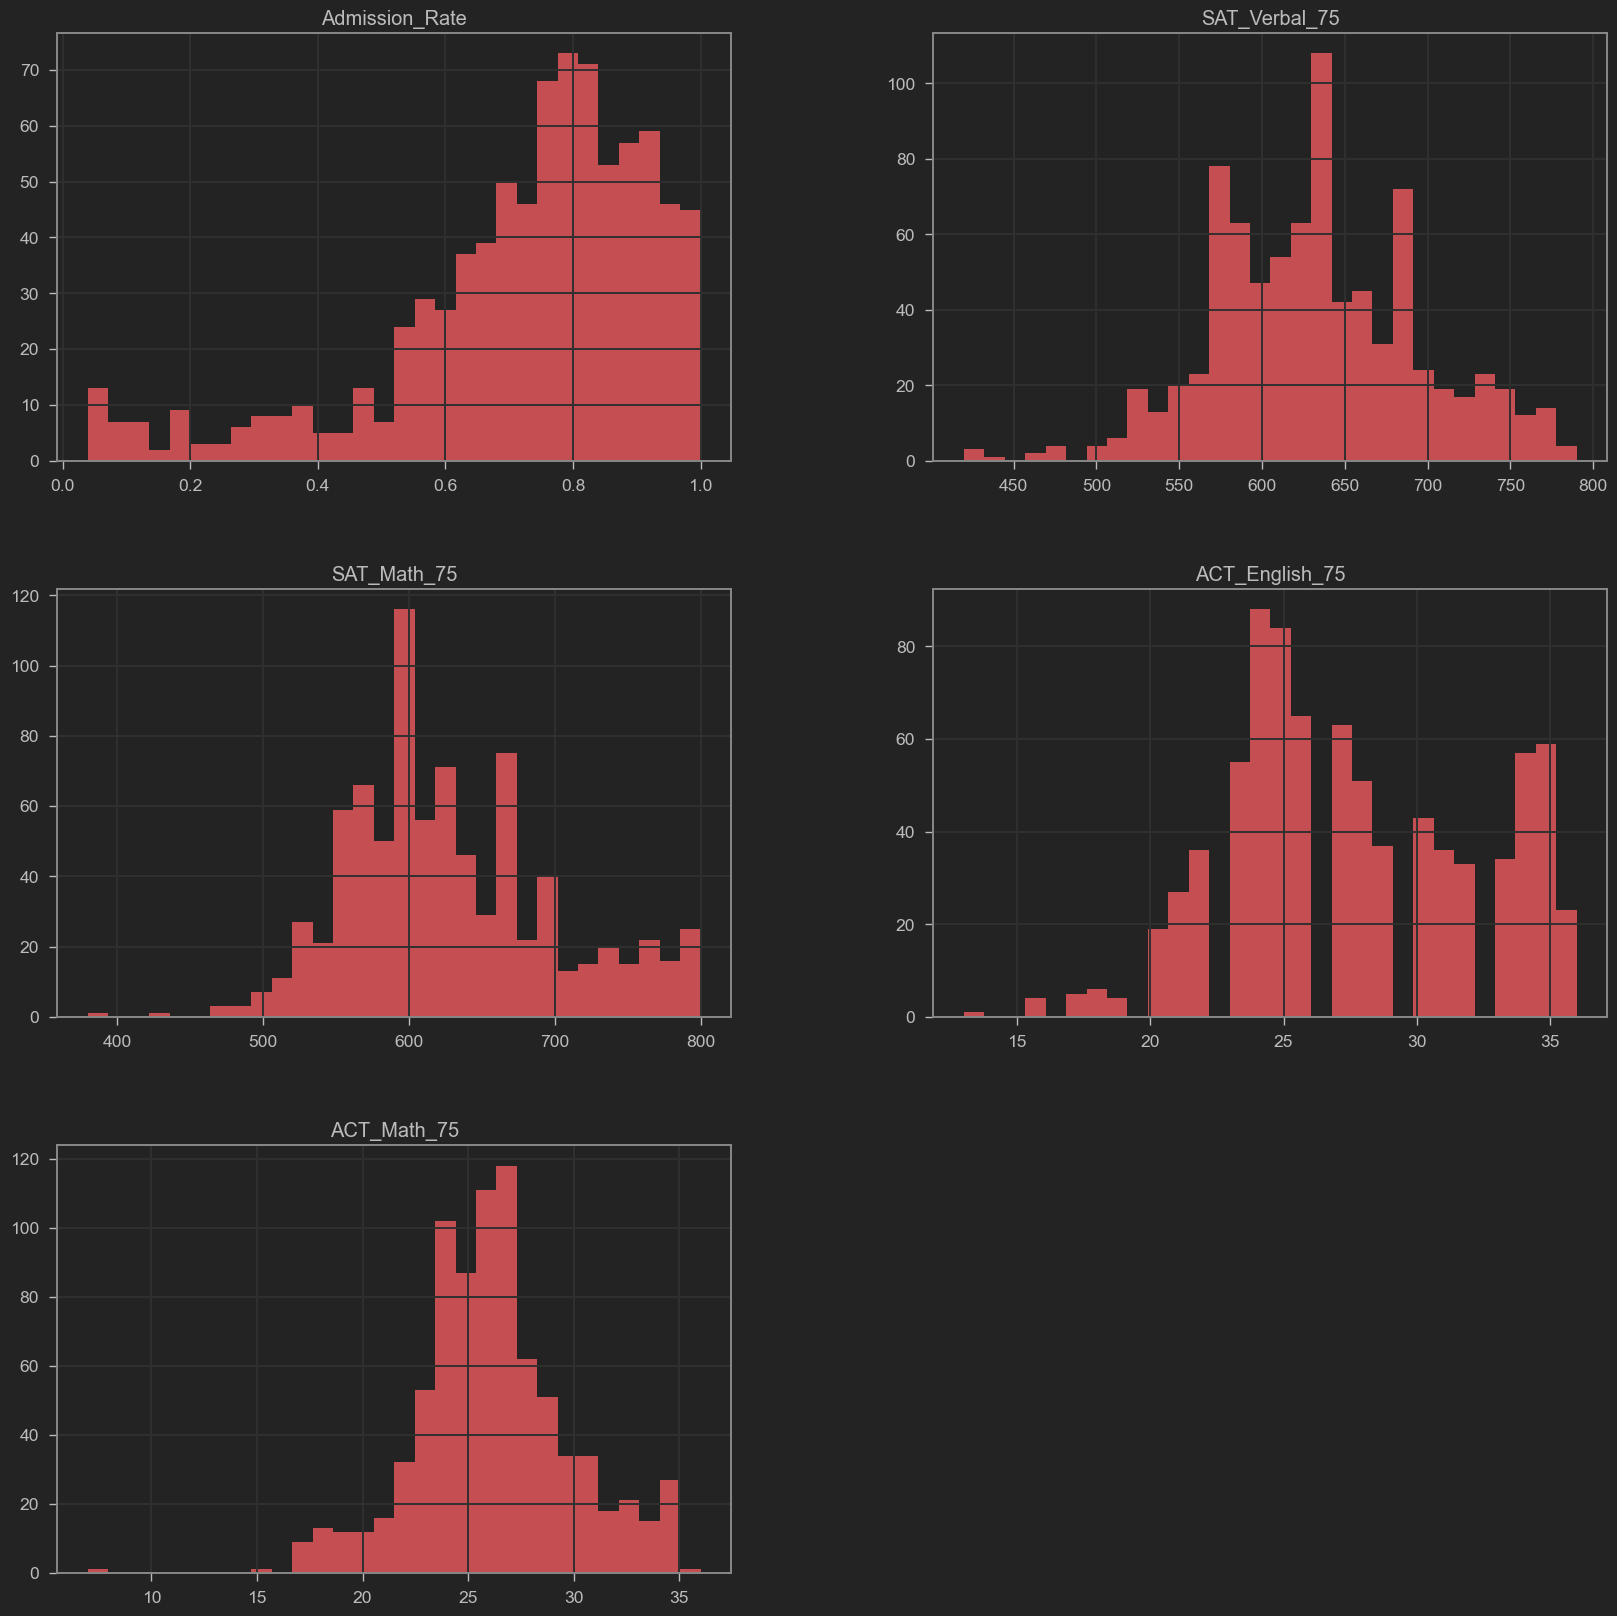

In [18]:
# Perform Data Visualization
# Plot a histogram of the data / distribution of the variables / features / distribution of data
edu_df.hist(bins = 30, figsize= (20,20), color = 'r' )

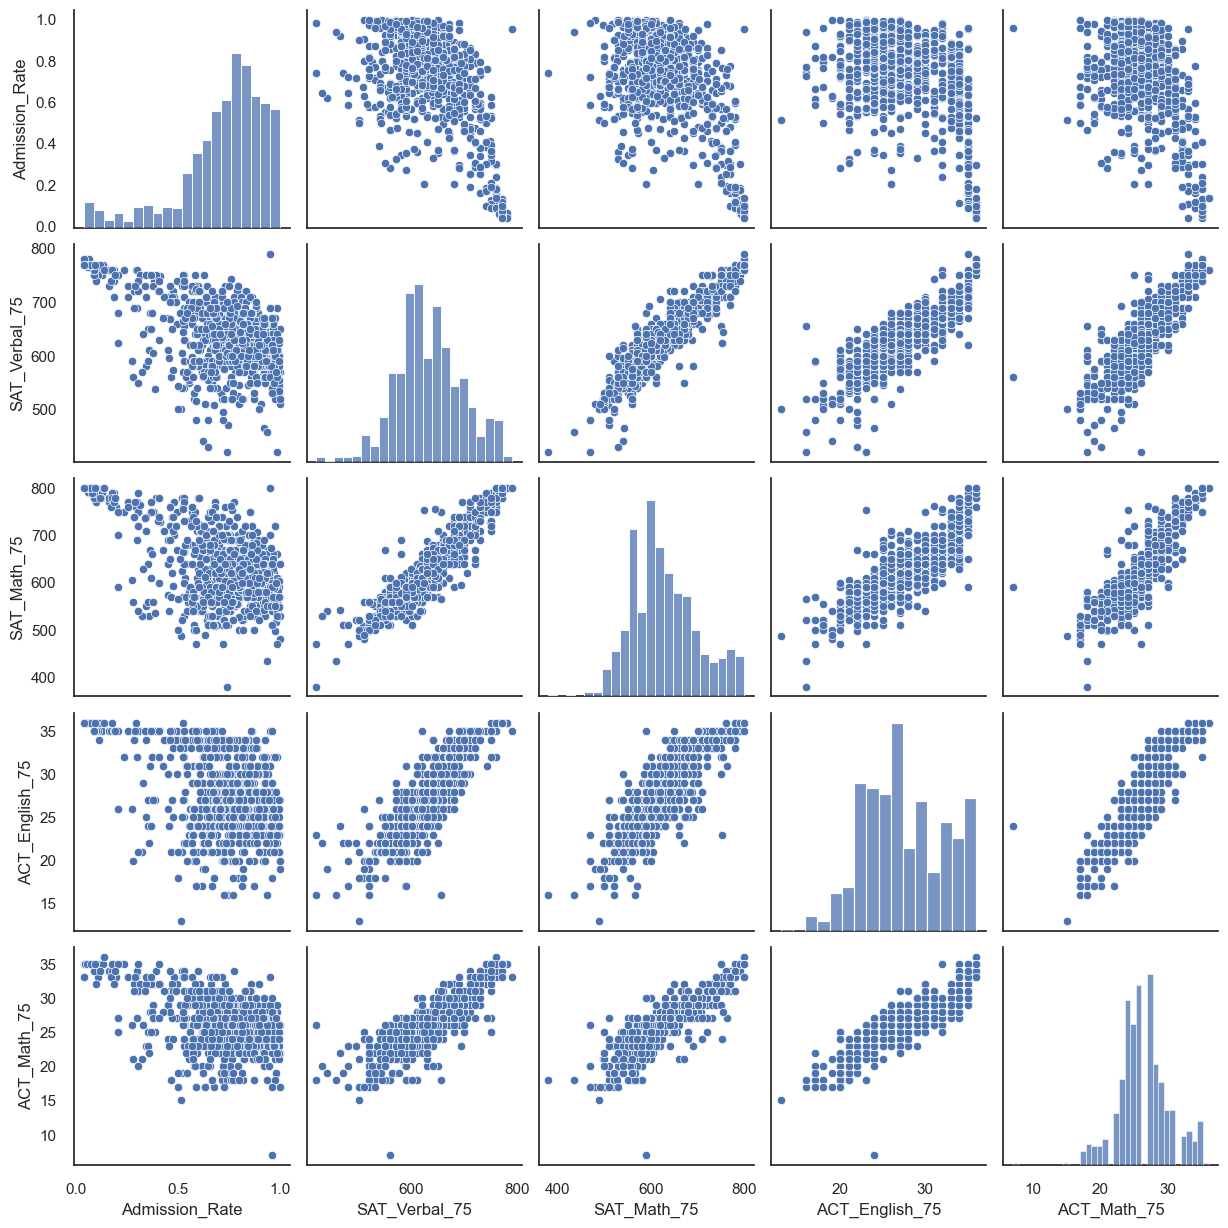

In [19]:
# Use seaborn library for plot the pairplot to take a look of the relationship between every single variable or feature in the dataframe
# this gives a view of the relationship between dependent and independent variables
sns.set_theme(style='white')
sns.pairplot(edu_df)


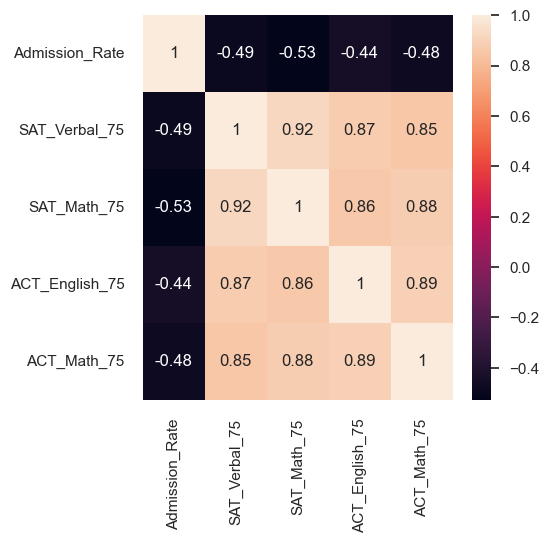

In [20]:
# Plot the correlation heatmap/ get the correlations of the data 
corr_matrix = edu_df.corr()

#Use seaborn to plot the heat map
plt.figure(figsize = (5,5))
sns.heatmap(corr_matrix, annot= True, ) # annot = True to see the actual #s when plotting the heatmap
plt.show()

# CREATE TRAINING AND TESTING DATASET

In [21]:
# Take a look at the admission_df columns
edu_df.columns

Index(['Admission_Rate', 'SAT_Verbal_75', 'SAT_Math_75', 'ACT_English_75',
       'ACT_Math_75'],
      dtype='object')

In [22]:
# Divide the data into inputs and outputs

In [23]:
# Inputs ('SAT_Verbal_75, SAT_Math_75, ACT_English_75, ACT_Math_75) - these are the independent variables
# drop the Admission_Rate column since that's our output variable
X = edu_df.drop(columns = ['Admission_Rate'])

In [24]:
# Ouput (Admission_Rate) is the target variable, this the one that we are trying to predict, the one where the model is to be built to predict the chance of admission
# Obtain only the Admission_Rate
y = edu_df['Admission_Rate']

In [25]:
# Take a look at the shape of X
X.shape

(830, 4)

In [26]:
# Take a look at the shape of y
y.shape

(830,)

In [27]:
# Take a look at y
y

0      0.716006
1      0.885352
2      0.736724
3      0.979913
4      0.789043
         ...   
825    0.899160
826    0.815870
827    0.603488
828    0.763591
829    0.922647
Name: Admission_Rate, Length: 830, dtype: float64

In [28]:
#Convert the data into a numpy array
X = np.array(X)
y = np.array(y)

In [29]:
# Reshape the output variable y to be 1355, 1, this will be helpful & powerful especially when dividing data into training and testing
y = y.reshape(-1,1)

# take a look at the shape
y.shape

(830, 1)

In [30]:
#scaling the data before training the model, making the features equal, not making the model to be biased
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Instantiate an object out of the class
scaler_x = StandardScaler()

#Apply the fit and transform method to the object to scale the data
X = scaler_x.fit_transform(X) # this gives a new scaled X value

In [31]:
# Scale y
#Instantiate an object out of the class
scaler_y = StandardScaler()

#Apply the fit and transform method to the object to scale the data
y = scaler_y.fit_transform(y) # this gives a new scaled y value

In [32]:
#Splitting the data in to tests and train sets
from sklearn.model_selection import train_test_split

# Set X_train, X_test, y_train, y_test and apply train_test_split and pass along the X, y and specify the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15) # allocate percent of the data for testing group, allocate the rest(85%) for training

# Note the testing data was not seen by the model since we are developing a model capable of generalizing based on the data, not wanting the model to memorize

In [33]:
# Train linear regression models
from sklearn.linear_model import LinearRegression

# Look at the metrics, get the accuracy score
from sklearn.metrics import mean_squared_error, accuracy_score

In [34]:
# Instantiate an object out of the LinearRegression class
LinearRegression_model = LinearRegression()

#Apply the fit method to my object
LinearRegression_model.fit(X_train, y_train) # fitting the data & the data here are the X_train (the input) & y_train (the output)

LinearRegression()

In [35]:
#Evaluate this model
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test) # this data the model has not seen before
accuracy_LinearRegression

0.21252435225574406

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Activation, Dropout #Dense is used to build dense artificial neural network
# Dropout is a irregularization technique to use ensure that the network is not overfitting, like dropping some neurons along with connected weights for the neurons not to develop dependency among each other
from tensorflow.keras.optimizers import Adam

In [37]:
ANN_model = Sequential()
ANN_model.add(Dense(50, input_dim = 4))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(100))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(100))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 activation_2 (Activation)   (None, 100)               0

In [38]:
# Compile the model
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [39]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
36/36 [==============================] - 1s 1ms/step - loss: 0.9035
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.6713
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.6157
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5828
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5988
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5393
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5543
Epoch 8/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5533
Epoch 9/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5566
Epoch 10/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5715
Epoch 11/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5607
Epoch 12/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5255
Epoch 13/100
36/36 [=================

In [40]:
# Apply the evaluate method on the testing data
result = ANN_model.evaluate(X_test, y_test)

# Plot the accuracy
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

4/4 [==============================] - 0s 2ms/step - loss: 0.5675
Accuracy : 0.43246209621429443


In [41]:
epochs_hist.history.keys()

dict_keys(['loss'])

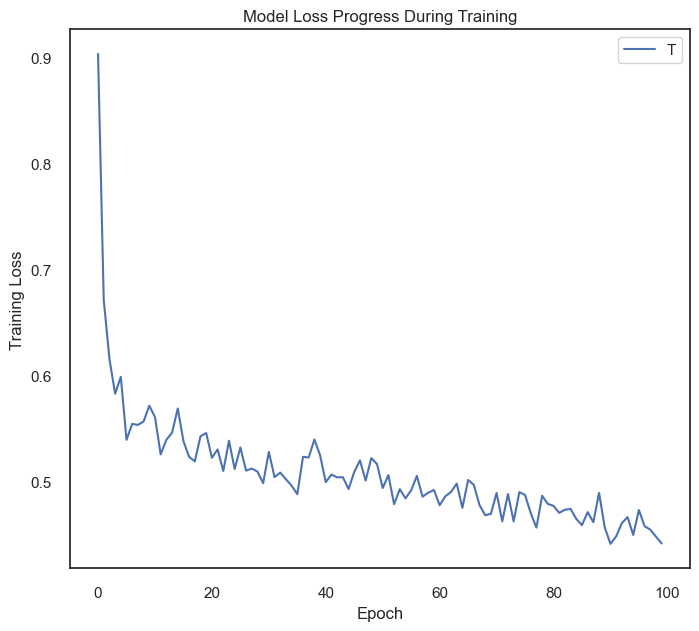

In [42]:
# Plot the loss
plt.plot(epochs_hist.history['loss']) # Plotting the loss which is the progression of the network through the number of epochs
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')